# Exercise 5 KNN

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from tensorflow.keras.datasets import mnist

(X_train, Y_train), (X_test, Y_test) = mnist.load_data()

X_train.shape, Y_train.shape, X_test.shape, Y_test.shape

((60000, 28, 28), (60000,), (10000, 28, 28), (10000,))

In [2]:
print(f"{X_train.shape}, There are 60000 images. With the shape 28x28")

(60000, 28, 28), There are 60000 images. With the shape 28x28


(0, 255) is the color strenght


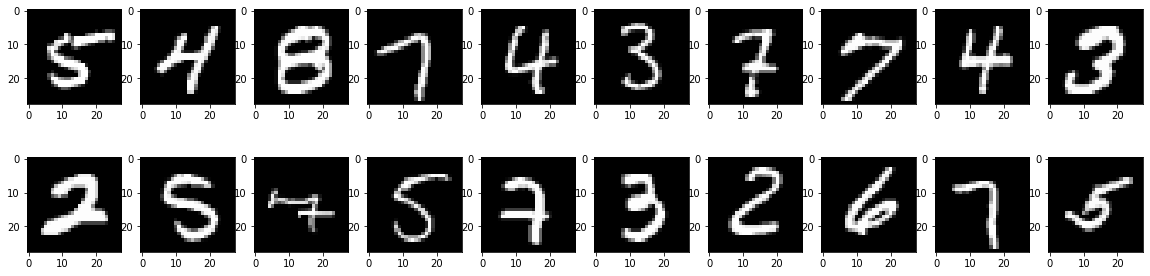

In [3]:
print(f"{X_train.min(), X_train.max()} is the color strenght")

fig, ax = plt.subplots(2, 10, figsize=(20,5))

for axes in ax.flatten():
    axes.imshow(X_train[np.random.randint(0, (len(X_train) - 1))], cmap="gray")

In [4]:
X_train_2 = X_train.reshape(len(X_train), 28*28)
X_test_2 = X_test.reshape(len(X_test), 28*28)
X_train_2.shape, X_test_2.shape

((60000, 784), (10000, 784))

## Train | Test | Validation split

In [5]:
from sklearn.model_selection import train_test_split

X_train, X_validation, y_train, y_validation = train_test_split(X_train_2, Y_train, test_size=0.16, random_state=42)

X_validation.shape, y_validation.shape

((9600, 784), (9600,))

## Hyperparameter tuning

In [7]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score

error_list = []

for k in range(1, 10):
    model_KNN = KNeighborsClassifier(n_neighbors=k)
    model_KNN.fit(X_train_2, y_train)
    y_pred = model_KNN.predict(X_train_2)
    accuracy = accuracy_score(y_pred, Y_test)

ValueError: Found input variables with inconsistent numbers of samples: [60000, 50400]